<div style="background-color:red; padding:20px; color:white; border-radius:20px; text-align:center; font-size:20px;">1 | Exploratory Data Analysis</div>


1. Exploratory Data Analysis (EDA)
- Multivariate
2. Pre-processing
3. Modelling
4. End Product

# **Food Delivery Time Prediction** 🛵

| **Field Name**            | **Description**                                                                                 | **Data Type**   |
|----------------------------|---------------------------------------------------------------------------------------------|-----------------|
| **Order_ID**              | Unique identifier for each order.                                                            | String/Integer  |
| **Distance_km**           | The delivery distance in kilometers.                                                         | Float           |
| **Weather**               | Weather conditions during the delivery (e.g., Clear, Rainy, Snowy, Foggy, Windy).            | Categorical     |
| **Traffic_Level**         | Traffic conditions categorized as Low, Medium, or High.                                      | Categorical     |
| **Time_of_Day**           | The time when the delivery took place (e.g., Morning, Afternoon, Evening, Night).            | Categorical     |
| **Vehicle_Type**          | Type of vehicle used for delivery (e.g., Bike, Scooter, Car).                                | Categorical     |
| **Preparation_Time_min**  | The time required to prepare the order, measured in minutes.                                 | Integer         |
| **Courier_Experience_yrs**| Experience of the courier in years.                                                          | Float           |
| **Delivery_Time_min**     | The total delivery time in minutes (target variable).                                        | Float           |
| **Usability**             | Indicates usability, scored at 10.00.                                                       | Float           |
| **License**               | Specifies the licensing type, here Apache 2.0.                                              | String          |
| **Expected update frequency** | Indicates that the dataset will not be updated.                                           | String          |


1. Exploratory Data Analysis (EDA)
   - Removing Unnecessary Data
   - Dealing with Duplicate Records
   - Outliers Anaysis
   - Uniquenes Analysis
   - Data Transformation
   - Data Validation
   - Univariate Data Visualization
     - Distribution Analysis
     - Box Plot 
   - Bivariate Data Visualization
   - Multivariate Data Visualization
     - Pairplot
2. Pre-processing
3. Modelling
4. End Product

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df_read = pd.read_csv("dataset/Food_Delivery_Times.csv")

In [4]:
df_read.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [5]:
print(f'Total Row Data: {df_read.shape[0]}')
print(f'Total Columns Data: {df_read.shape[1]}')

Total Row Data: 1000
Total Columns Data: 9


In [6]:
df_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


**We Can See:**
- All the datatypes was correct 

In [7]:
df_read.isna().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

**We Can See:**
- There are not valid value on `Weather`, `Trafic_Level`, `Time_of_day`, and `Courier_Experience_yrs`
- all column with NaN data equal of 30 
- we can determine to handle to remove or fill with mean

In [8]:
df_read.duplicated().sum()

0

In [9]:
df_read[df_read.duplicated() == True]

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min


**We Can See:**
- There are no duplicates entry
- no need handle in pre-pro

In [10]:
df_read.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


**We Can See:**
- 

In [11]:
df_read.describe(include=object)

,Weather,Traffic_Level,Time_of_Day,Vehicle_Type
count,970,970,970,1000
unique,5,3,4,3
top,Clear,Medium,Morning,Bike
freq,470,390,308,503


In [12]:
for col in numerical_columns:
    Q1 = df_read[col].quantile(0.25)
    Q3 = df_read[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_read[(df_read[col] < lower_bound) | (df_read[col] > upper_bound)]
    print(f"Outliers for {col}:")
    display(outliers)

NameError: name 'numerical_columns' is not defined

**We Can See:**
- The dataset were clean with outliers, except column `Delivery_Time_min`
- `Delivery_Time_min` has 6 row data, with caracteristic above 120, and no below that
- We can determine to keep the outliers because not effect to the model significanly and give the model a variance

In [66]:
df_read = df_read.drop(columns=['Order_ID'])

# Univariate Analysis

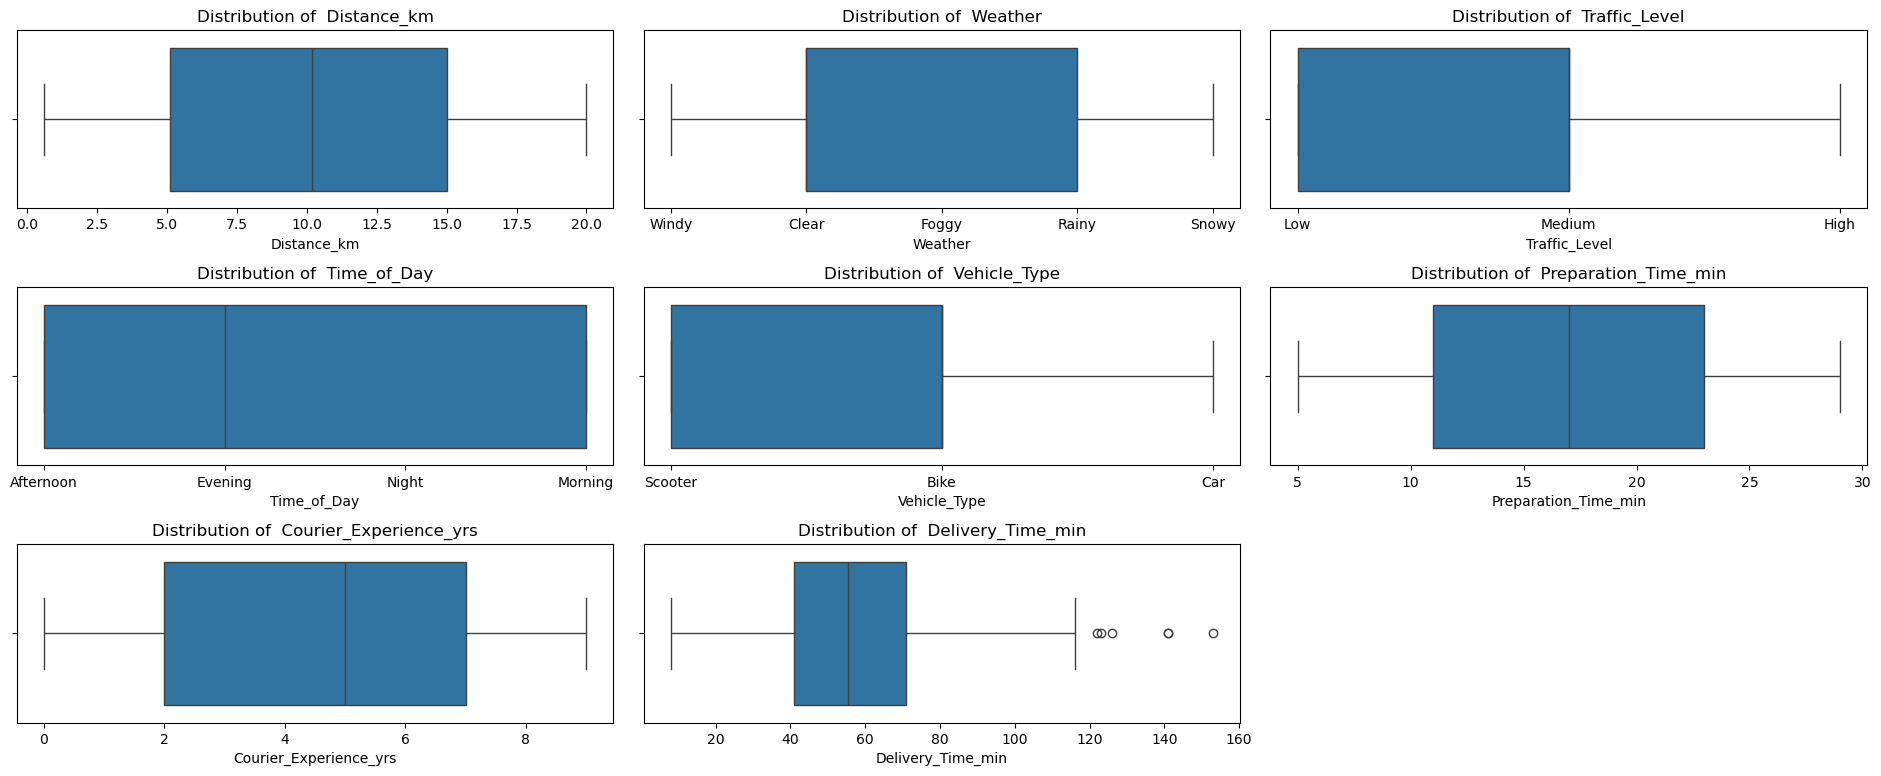

In [71]:
plt.figure(figsize=(19, 10))
for i, col in enumerate(df_read.columns):
    plt.subplot(4, 3, i+1)
    plt.title(f'Distribution of  {col}')
    sns.boxplot(data=df_read, x=col)
plt.tight_layout()
plt.show()

**We Can See:**
- All data in h

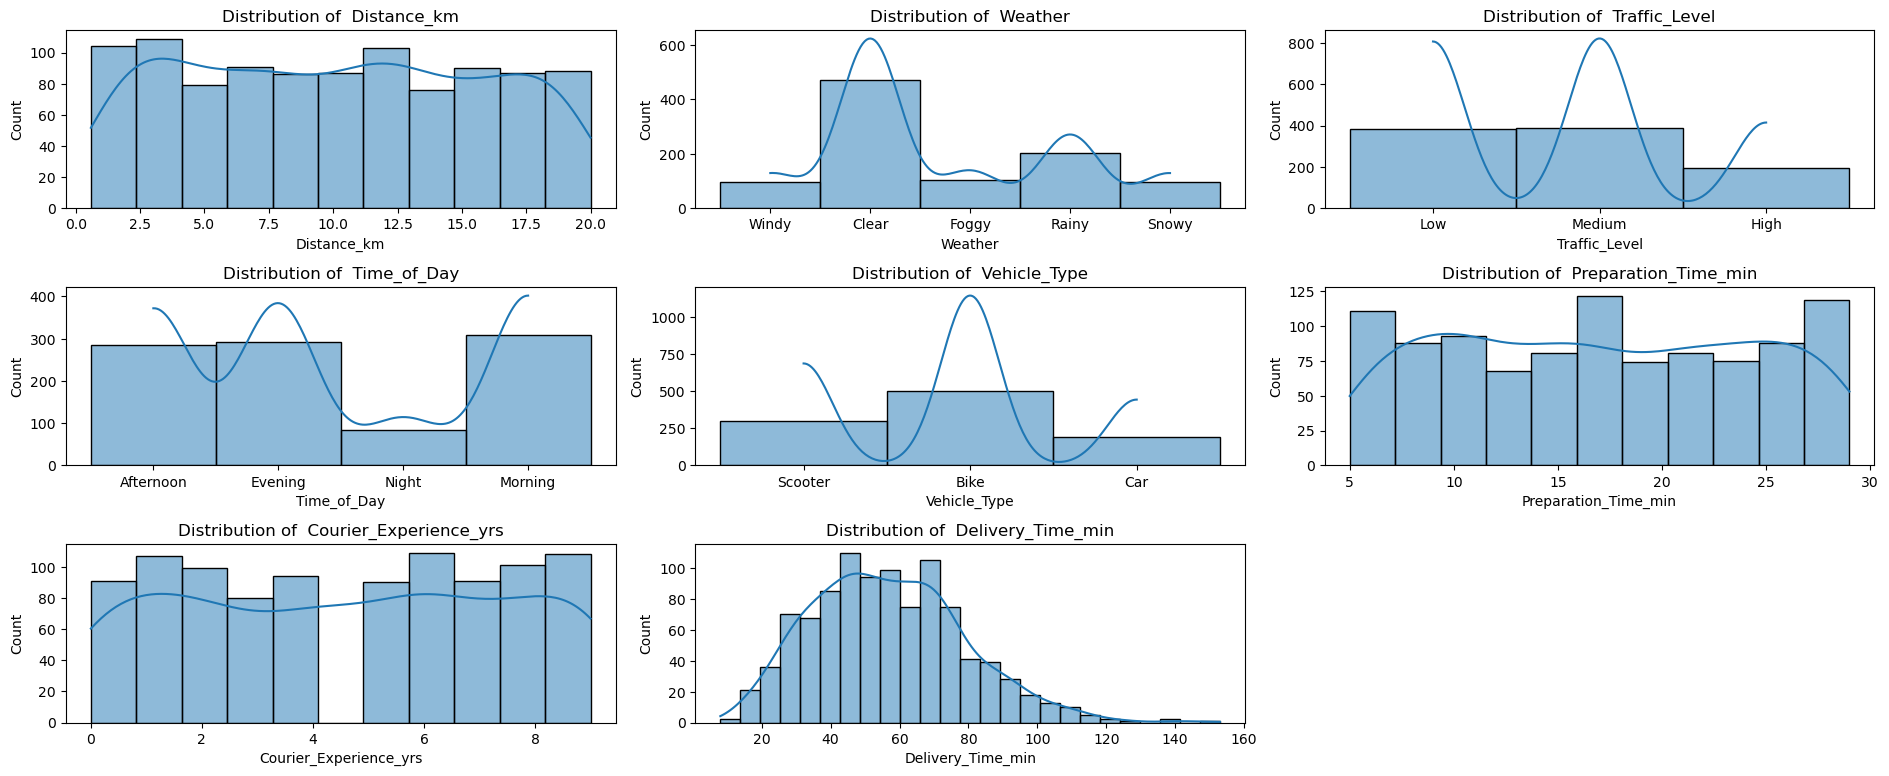

In [68]:
plt.figure(figsize=(19, 10))
for i, col in enumerate(df_read.columns):
    plt.subplot(4, 3, i+1)
    plt.title(f'Distribution of  {col}')
    sns.histplot(data=df_read, x=col, kde=True)
plt.tight_layout()
plt.show()

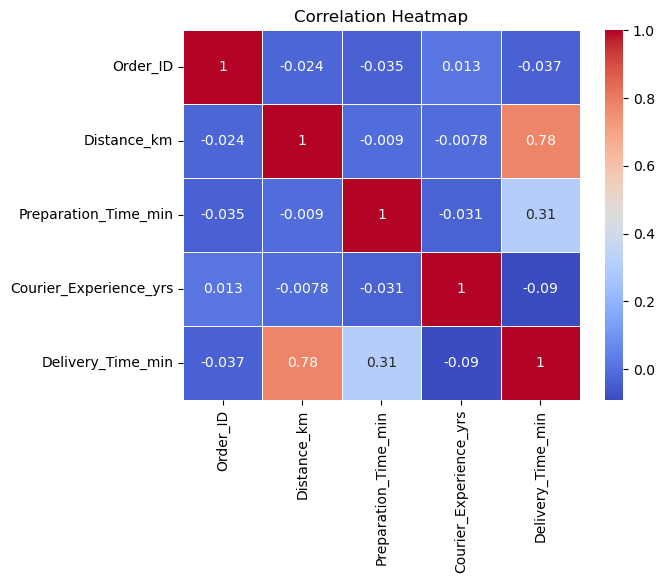

In [39]:
# Select only numeric columns
numeric_df = df_read.select_dtypes(include=[np.number])

# Plot the heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [79]:
correlation_matrix = numeric_df.corr()
delivery_time_correlation = correlation_matrix["Delivery_Time_min"].sort_values(ascending=False)
print(delivery_time_correlation)

Delivery_Time_min         1.000000
Distance_km               0.780998
Preparation_Time_min      0.307350
Order_ID                 -0.036650
Courier_Experience_yrs   -0.090433
Name: Delivery_Time_min, dtype: float64


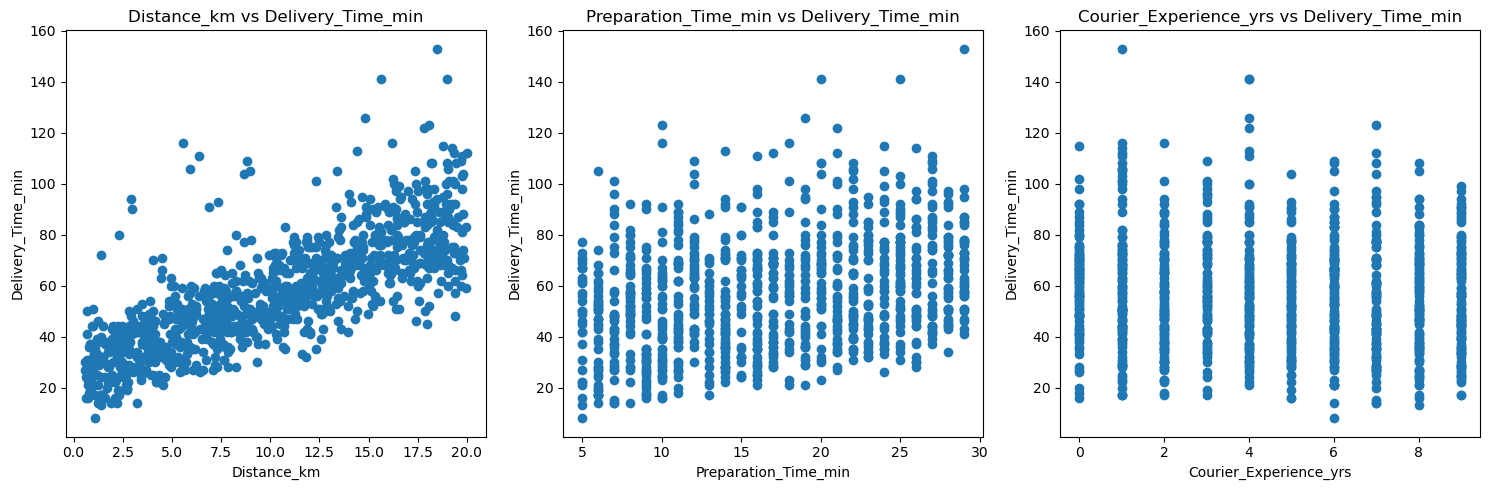

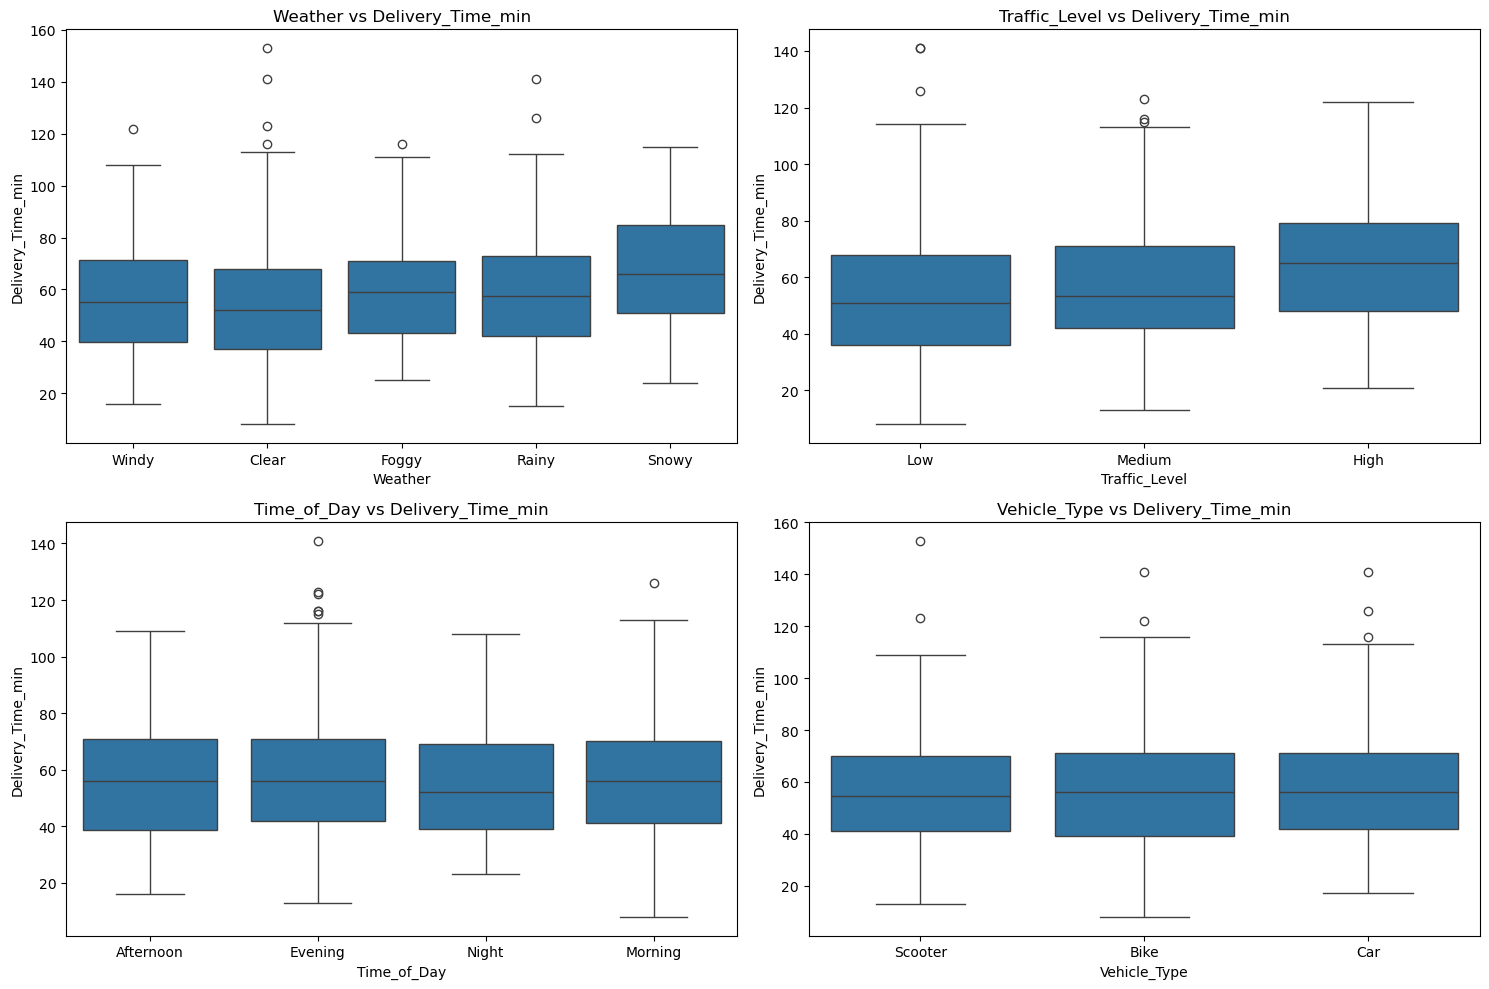

In [80]:


# Box plots for categorical columns
categorical_columns = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df_read[col], y=df_read['Delivery_Time_min'])
    plt.title(f'{col} vs Delivery_Time_min')
    plt.xlabel(col)
    plt.ylabel('Delivery_Time_min')
plt.tight_layout()
plt.show()

1. Input Predict Distance_KM
2. Output delivery time min

3. Setting, change model OLS or Gradient Decent -> Learning Rate & Epochs

Accuracy -> Mean Absolute Error & Mean Absolute Percentage Error


In [1]:
import tkinter as tk 
from tkinter import ttk, messagebox
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import os
from sklearn.linear_model import LinearRegression

class DeliveryTimePredictionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Delivery Time Prediction App")
        self.root.attributes('-fullscreen', True)
        
        self.history = pd.DataFrame()
        self.model = LinearRegression()
        self.sandbox_mode = False
        
        # Create Tabs
        self.tab_control = ttk.Notebook(root)
        self.predict_tab = ttk.Frame(self.tab_control)
        self.history_tab = ttk.Frame(self.tab_control)
        self.setting_tab = ttk.Frame(self.tab_control)
        
        self.tab_control.add(self.predict_tab, text="Predict")
        self.tab_control.add(self.history_tab, text="History")
        self.tab_control.add(self.setting_tab, text="Settings")
        self.tab_control.pack(expand=1, fill='both')
        
        # initialize tabs
        self.init_predict_tab()
        self.init_history_tab()
        self.init_setting_tab()
    
    def init_predict_tab(self):
        predict_form_frame = ttk.Frame(self.predict_tab)
        predict_form_frame.grid(column=0, row=1, sticky="nsew")
        
        ttk.Label(predict_form_frame, text="Input Distance (km)", font=('Poppins', 20)).grid(row=0, column=0, padx=10, pady=10)
        self.distance_entry = ttk.Entry(predict_form_frame)
        self.distance_entry.grid(row=0, column=1, padx=10, pady=10)
        
        ttk.Button(predict_form_frame, text="Predict", padx=30, pady=10, command=self.predict_time).grid(row=1, column=0, columnspan=2, pady=10)
        
        self.fig, self.ax = plt.subplots()
        self.canvas = FigureCanvasTkAgg(self.fig, master=predict_form_frame)
        self.canvas.get_tk_widget().grid(row=2, column=0, columnspan=2, pady=10)
        
        self.plot_training_data()
        
    def init_history_tab(self):
        self.history_tree = ttk.Treeview(self.history_tab, columns=('timestamp', 'time_predicted', 'distance'), show='headings')
        self.history_tree.heading('timestamp', text='Timestamp')
        self.history_tree.heading('time_predicted', text='Time Predicted')
        self.history_tree.heading('distance', text='Distance')
        self.history_tree.grid(row=0, column=0, padx=10, pady=10)
        
        ttk.Button(self.history_tab, text="Compare Selected", command=self.compare_selected).grid(row=1, column=0, pady=10)
    
    def init_setting_tab(self):
        self.sandbox_mode_var = tk.BooleanVar()
        ttk.Checkbutton(self.setting_tab, text="SandBox Mode", variable=self.sandbox_mode_var, command=self.toggle_sandbox_mode).grid(row=0, column=0, padx=10)
        
        ttk.Label(self.setting_tab, text="Learning Rate:").grid(row=1, column=0, padx=10, pady=10)
        self.learning_rate_var = tk.StringVar(value="0.01")
        self.learning_rate_select = ttk.Combobox(self.setting_tab, textvariable=self.learning_rate_var, values=["0.01", "0.001", "0.0001"])
        self.learning_rate_select.grid(row=1, column=1, padx=10, pady=10)

        ttk.Label(self.setting_tab, text="Epochs:").grid(row=2, column=0, padx=10, pady=10)
        self.epochs_var = tk.IntVar(value=10)
        self.epochs_entry = ttk.Entry(self.setting_tab, textvariable=self.epochs_var)
        self.epochs_entry.grid(row=2, column=1, padx=10, pady=10)

        ttk.Label(self.setting_tab, text="Model:").grid(row=3, column=0, padx=10, pady=10)
        self.model_var = tk.StringVar(value="OLS")
        self.model_select = ttk.Combobox(self.setting_tab, textvariable=self.model_var, values=["OLS", "Gradient Descent"])
        self.model_select.grid(row=3, column=1, padx=10, pady=10)
    def plot_training_data(self):
        self.ax.scatter(self.X_train[:, 0], self.y_train, color='blue', label="Training Data")
        
        self.model.fit(self.X_train, self.y_train)
        y_pred = self.mode.predict(self.X_train)
        self.ax.plot(self.X_train[:, 0], y_pred, color='green', label='Regression Line')
        
        self.ax.set_xlabel
    def predict_time(self)
if __name__ == "__main__":
    root = tk.Tk()
    app =  DeliveryTimePredictionApp(root)       

SyntaxError: expected ':' (2143671608.py, line 87)